In [14]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from numpy.linalg import norm

def zero_noise(dx):
    return 0

def uniform(a, b, dx):
    return np.random.uniform(a, b, size=dx.shape)

def percent_noise(dx, alpha=2):
    return np.random.uniform(-alpha/2*dx, +alpha/2*dx)
    

'''
Returns an approximation of the path that a drone would take given an array of change in position updates
DELTAS represents the change in position for each step along the path
NOISE_FN applies noise to each path update, causing a deviation compared to the true path, achieve by 
simply summing up the elements of DELTAS
path[0] represents the location of the drone after update deltas[0],
unless prepend_zero == True, in which case it is [0, 0].
'''
def simulate_input(deltas, noise_fn=zero_noise, prepend_zero=True):
    path = np.zeros(deltas.shape)
    for i in range(len(path)):
        path[i] = path[i-1] + deltas[i] + noise_fn(deltas[i])
    
    if prepend_zero:
        return np.concatenate((np.zeros((1,2)), path), axis=0)
    else:
        return path

In [417]:
def wide_uturn(leg=10):
    ones = np.ones((leg,1));
    zeros = np.zeros((leg,1));
    
    leg1 = np.hstack((ones, zeros))
    leg2 = np.hstack((zeros, ones))
    leg3 = np.hstack((-ones, zeros))
    return np.concatenate((leg1, leg2, leg3), axis=0)

def s_turn(short_leg=5):
    ones = np.ones((short_leg,1));
    zeros = np.zeros((short_leg,1));
    
    leg1 = np.hstack((ones, zeros))
#     leg2 = np.hstack(np.repeat((zeros, ones), 2, axis=1)) # make vertical stem length = 2*short_length
    leg2 = np.hstack((zeros*2, ones*2))
    leg3 = np.hstack((ones, zeros))
    return np.concatenate((leg1, leg2, leg3), axis=0)

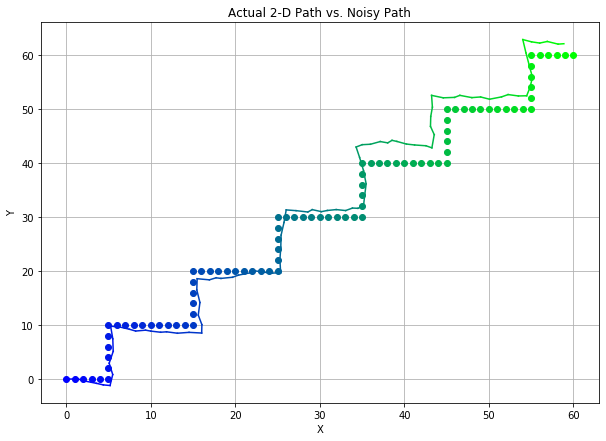

In [418]:
fig = plt.figure(figsize=(10,7))

noise_fn = partial(uniform, -.5, .5)

# deltas = np.random.uniform(-1,1,size=100)
# deltas = np.linspace(0, 10, 100)



deltas = np.vstack([s_turn() for _ in range(6)])
path_true = simulate_input(deltas, prepend_zero=True);
path_simulated = simulate_input(deltas, noise_fn);

T = np.linspace(0, 1, path_true.shape[0])
for i in range(path_true.shape[0]):
    plt.plot(path_true[i,0], path_true[i,1], 'o', color=(0, T[i], 1-T[i]))
    plt.plot(path_simulated[i:i+2,0], path_simulated[i:i+2,1], '-', color=(0, T[i], 1-T[i]))
    
plt.title("Actual 2-D Path vs. Noisy Path");
plt.xlabel("X");
plt.ylabel("Y");
plt.grid(True);

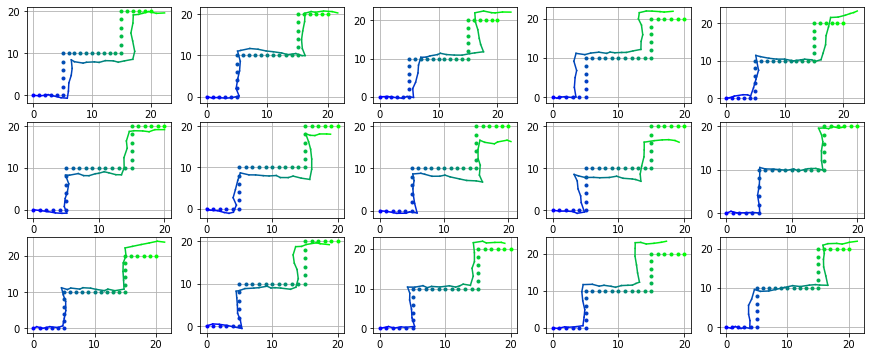

In [419]:
fig = plt.figure(figsize=(15,6))

deltas = np.vstack([s_turn() for _ in range(2)])
path_true = simulate_input(deltas);

N = 15
error = np.zeros((N, path_true.shape[0]))
for i in range(N):
    plt.subplot(3, 5, i+1)
    plt.grid()
    path_simulated = simulate_input(deltas, noise_fn);
    error[i] = norm(path_true - path_simulated, axis=1) # calculate the L2 error for each point

    T = np.linspace(0, 1, path_true.shape[0])
    for i in range(path_true.shape[0]):
        plt.plot(path_true[i,0], path_true[i,1], '.', color=(0, T[i], 1-T[i]))
        plt.plot(path_simulated[i:i+2,0], path_simulated[i:i+2,1], '-', color=(0, T[i], 1-T[i]))

# Take the average of the error for each iteration
error = error.mean(axis=0)

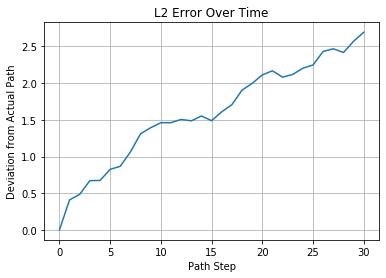

In [420]:
plt.plot(error)
plt.title("L2 Error Over Time")
plt.xlabel("Path Step")
plt.ylabel("Deviation from Actual Path");
plt.grid()

In [432]:
'''A function that returns the estimated final position of the drone and the modeled uncertainty of that position.'''
def model(input_path):
    estimated_path = np.copy(input_path)
    estimated_uncertainty = np.zeros_like(input_path)
    
    input_deltas = np.diff(input_path, axis=0)
    for i in range(1, input_path.shape[0]):
        estimated_uncertainty[i] = input_deltas[i-1] * 0.05 # 5% uncertainty
        
    return estimated_path, estimated_uncertainty
        
estimated_path, estimated_uncertainty = model(path_simulated)
T = np.linspace(0, 1, path_true.shape[0])
for i in range(path_true.shape[0]):
    plt.plot(path_true[i,0], path_true[i,1], 'o', color=(0, T[i], 1-T[i]))
    plt.plot(path_simulated[i:i+2,0], path_simulated[i:i+2,1], '-', color=(0, T[i], 1-T[i]))
    
plt.title("Actual 2-D Path vs. Noisy Path");
plt.xlabel("X");
plt.ylabel("Y");
plt.grid(True);

(array([[ 0.        ,  0.        ],
        [ 0.86089939, -0.32892509],
        [ 1.50284187,  0.12855097],
        [ 2.42936964, -0.35884438],
        [ 3.15325665, -0.11271007],
        [ 3.8574954 , -0.34624829],
        [ 3.89264198,  1.63788398],
        [ 3.66836379,  3.26265884],
        [ 3.66548074,  5.55177568],
        [ 4.16322735,  7.13673794],
        [ 4.62384173,  9.58308192],
        [ 5.58335081,  9.12602059],
        [ 6.94579072,  9.21195452],
        [ 8.14409993,  9.63750933],
        [ 9.51953642, 10.12887667],
        [10.84043915, 10.57858785],
        [12.08222693, 10.35691051],
        [13.57877844, 10.71506174],
        [14.55252367, 10.84284861],
        [15.2388919 , 10.73220254],
        [16.56849135, 10.67436326],
        [16.2451503 , 13.07168258],
        [15.89302007, 15.35448638],
        [15.86186   , 17.30601759],
        [15.99763378, 18.82157045],
        [15.78192477, 20.91715638],
        [16.56382004, 21.31180748],
        [18.01771818, 21.381

In [425]:
path_simulated.shape, np.diff(path_simulated, axis=0).shape

((31, 2), (30, 2))